## POSTTEST 5 Kecerdasan Buatan
### Nama : Narupa Rangga Goroguta
### NIM : 2209106004

In [184]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn import svm
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score, adjusted_rand_score, normalized_mutual_info_score
from sklearn.metrics import homogeneity_score, completeness_score, v_measure_score
from sklearn.inspection import DecisionBoundaryDisplay

In [185]:
incomenew = pd.read_csv('income.csv')
incomenew

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,40,Self-emp-not-inc,223881,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,99999,0,70,United-States,>50K
1,30,Private,149118,HS-grad,9,Divorced,Craft-repair,Not-in-family,White,Female,0,0,40,United-States,<=50K
2,46,Private,109209,Some-college,10,Married-civ-spouse,Adm-clerical,Husband,White,Male,0,0,40,United-States,>50K
3,32,Private,229566,Assoc-voc,11,Married-civ-spouse,Other-service,Husband,White,Male,0,0,60,United-States,>50K
4,54,?,148657,Preschool,1,Married-civ-spouse,?,Wife,White,Female,0,0,40,Mexico,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,40,Private,130834,Some-college,10,Never-married,Adm-clerical,Not-in-family,White,Female,0,0,40,United-States,<=50K
24996,31,Local-gov,33124,Bachelors,13,Never-married,Prof-specialty,Not-in-family,White,Female,0,0,50,United-States,<=50K
24997,38,Federal-gov,190895,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,?,>50K
24998,23,Private,420973,Bachelors,13,Never-married,Prof-specialty,Not-in-family,White,Female,0,0,40,United-States,<=50K


## Supervised

In [186]:
encoder = LabelEncoder()
incomenew['income'] = encoder.fit_transform(incomenew['income'])
incomenew['workclass'] = encoder.fit_transform(incomenew['workclass'])
incomenew['education'] = encoder.fit_transform(incomenew['education'])
incomenew['marital.status'] = encoder.fit_transform(incomenew['marital.status'])
incomenew['occupation'] = encoder.fit_transform(incomenew['occupation'])
incomenew['relationship'] = encoder.fit_transform(incomenew['relationship'])
incomenew['sex'] = encoder.fit_transform(incomenew['sex'])
incomenew['race'] = encoder.fit_transform(incomenew['race'])
incomenew['native.country'] = encoder.fit_transform(incomenew['native.country'])
incomenew

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,40,6,223881,14,15,2,10,0,4,1,99999,0,70,38,1
1,30,4,149118,11,9,0,3,1,4,0,0,0,40,38,0
2,46,4,109209,15,10,2,1,0,4,1,0,0,40,38,1
3,32,4,229566,8,11,2,8,0,4,1,0,0,60,38,1
4,54,0,148657,13,1,2,0,5,4,0,0,0,40,25,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,40,4,130834,15,10,4,1,1,4,0,0,0,40,38,0
24996,31,2,33124,9,13,4,10,1,4,0,0,0,50,38,0
24997,38,1,190895,9,13,2,10,0,4,1,0,0,40,0,1
24998,23,4,420973,9,13,4,10,1,4,0,0,0,40,38,0


In [187]:
scaler = StandardScaler()

X = incomenew[['age', 'education.num']]
y = incomenew['income']

X = scaler.fit_transform(X)
X

array([[ 0.1016226 ,  1.91068716],
       [-0.62903367, -0.41767759],
       [ 0.54001636, -0.0296168 ],
       ...,
       [-0.04450866,  1.13456557],
       [-1.14049306,  1.13456557],
       [ 1.56293513, -1.58185996]])

In [188]:
incomenew.corr()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
age,1.000000,0.005332,-0.072013,-0.007177,0.039921,-0.261326,-0.019622,-0.263500,0.030459,0.086622,0.078954,0.053195,0.071228,0.002348,0.233815
workclass,0.005332,1.000000,-0.014660,0.023962,0.054976,-0.064635,0.257666,-0.090030,0.052488,0.094906,0.032118,0.015445,0.134950,-0.003002,0.051823
fnlwgt,-0.072013,-0.014660,1.000000,-0.025116,-0.044136,0.023264,0.000256,0.007573,-0.020901,0.025766,0.002188,-0.005649,-0.016832,-0.051887,-0.005697
education,-0.007177,0.023962,-0.025116,1.000000,0.362981,-0.041857,-0.015395,-0.013423,0.013336,-0.023191,0.030498,0.016237,0.060605,0.062064,0.084450
education.num,0.039921,0.054976,-0.044136,0.362981,1.000000,-0.071578,0.112771,-0.092037,0.031573,0.006961,0.123863,0.073813,0.149137,0.051429,0.338369
marital.status,-0.261326,-0.064635,0.023264,-0.041857,-0.071578,1.000000,-0.012566,0.187810,-0.069451,-0.126849,-0.046316,-0.034630,-0.192428,-0.024171,-0.203588
occupation,-0.019622,0.257666,0.000256,-0.015395,0.112771,-0.012566,1.000000,-0.074767,0.009771,0.080328,0.025640,0.015852,0.081419,-0.015678,0.078077
relationship,-0.263500,-0.090030,0.007573,-0.013423,-0.092037,0.187810,-0.074767,1.000000,-0.115276,-0.582055,-0.055743,-0.059709,-0.253415,-0.002752,-0.250765
race,0.030459,0.052488,-0.020901,0.013336,0.031573,-0.069451,0.009771,-0.115276,1.000000,0.086346,0.012740,0.020623,0.038605,0.133024,0.069827
sex,0.086622,0.094906,0.025766,-0.023191,0.006961,-0.126849,0.080328,-0.582055,0.086346,1.000000,0.046797,0.047043,0.232349,-0.005903,0.215469


#### A1. Support Vector Classifier

In [189]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [190]:
svm = svm.SVC(kernel='rbf')
svm.fit(X_train, y_train)

SVC()

In [191]:
y_pred = svm.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 1, 0])

#### Evaluasi Hasil Prediksi

In [192]:
svm.score(X_test, y_test)

0.7892

In [193]:
cm = confusion_matrix(y_test, y_pred, labels=[0,1])

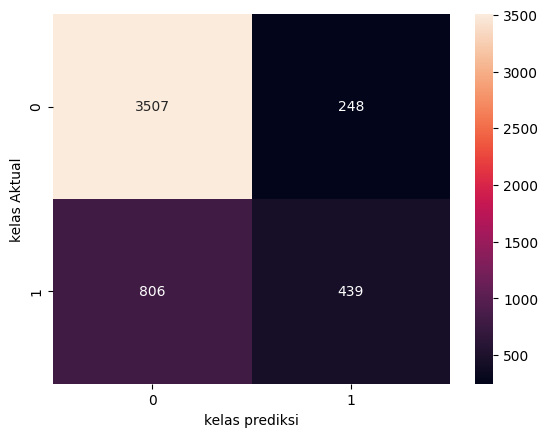

In [194]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('kelas prediksi')
plt.ylabel('kelas Aktual')
plt.show()

C:\Users\Acer-GK\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Acer-GK\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


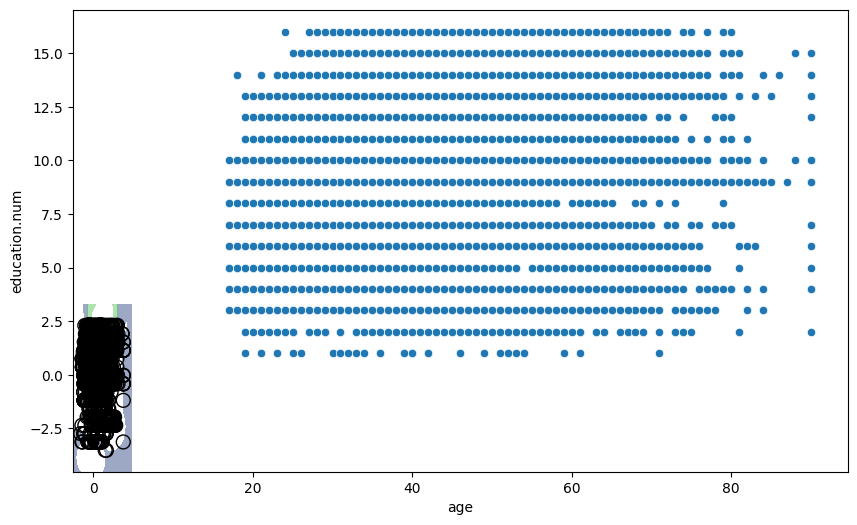

In [195]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='age', y='education.num', data=incomenew)

ax = plt.gca()

DecisionBoundaryDisplay.from_estimator(
    estimator=svm,
    X=X,
    plot_method="contourf",
    levels=[-1, 0, 1],
    alpha=0.5,
    linestyles=["--", "==", "=="],
    ax=ax,
)

ax.scatter(
    svm.support_vectors_[:, 0],
    svm.support_vectors_[:, 1],
    s=100,
    linewidth=1,
    facecolors="none",
    edgecolors="k",
)

plt.xlabel('age')
plt.ylabel('education.num')
plt.show()
    

## Unsupervised

#### B1. K-Means

In [196]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
X = incomenew[['age', 'education.num']]
K = 2
kmeans = KMeans(n_clusters=K, n_init=10)
kmeans.fit(X)
cluster_labels = Kmeans.labels_
incomenew["cluster"] = cluster_labels
centroids = kmeans.cluster_centers_
cluster_mapping = {0: 1, 1: 0 }
incomenew["cluster"] = incomenew['cluster'].map(cluster_mapping)

#### b2 Evaluasi Hasil Clustering

In [197]:
#silhouette Score
ss_score = silhouette_score(X, incomenew['cluster'])
print(f"Silhouette Score: {ss_score:.2f}")

#Davies-Bouldin Index
db_index = davies_bouldin_score(X, incomenew['cluster'])
print(f"David-Bouldin Index: {db_index:.2f}")

# calinski-Harabasz Index
ch_index = calinski_harabasz_score(X, incomenew['cluster'])
print(f"Calinski-harabasz Index: {ch_index:.2f}")

Silhouette Score: 0.56
David-Bouldin Index: 0.62
Calinski-harabasz Index: 48559.52


In [198]:
cross_tab = pd.crosstab(incomenew["cluster"], incomenew["income"])
print("cross-Tabulation :")
print(cross_tab, "\n")

ari = adjusted_rand_score(incomenew["income"], incomenew['cluster'])
print(f"Adjusted Rand Index (ARI): {ari:.2f}")

nmi = normalized_mutual_info_score(incomenew['income'], incomenew['cluster'])
print(f"Normalized_mutual Information (NMI): {nmi:.2f}")

homogeneity = homogeneity_score(incomenew["income"], incomenew['cluster'])
completeness = completeness_score(incomenew["income"], incomenew['cluster'])
v_measure = v_measure_score(incomenew["income"], incomenew['cluster'])
print(f"Homogeneity Score: {homogeneity:.2f}")
print(f"Completeness Score: {completeness:.2f}")
print(f"V-Measure Score: {v_measure:.2f}")


cross-Tabulation :
income       0     1
cluster             
0        12273  2378
1         6682  3667 

Adjusted Rand Index (ARI): 0.07
Normalized_mutual Information (NMI): 0.04
Homogeneity Score: 0.04
Completeness Score: 0.04
V-Measure Score: 0.04


#### B3 Plot Hasil Clustering

C:\Users\Acer-GK\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Acer-GK\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Acer-GK\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Acer-GK\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype

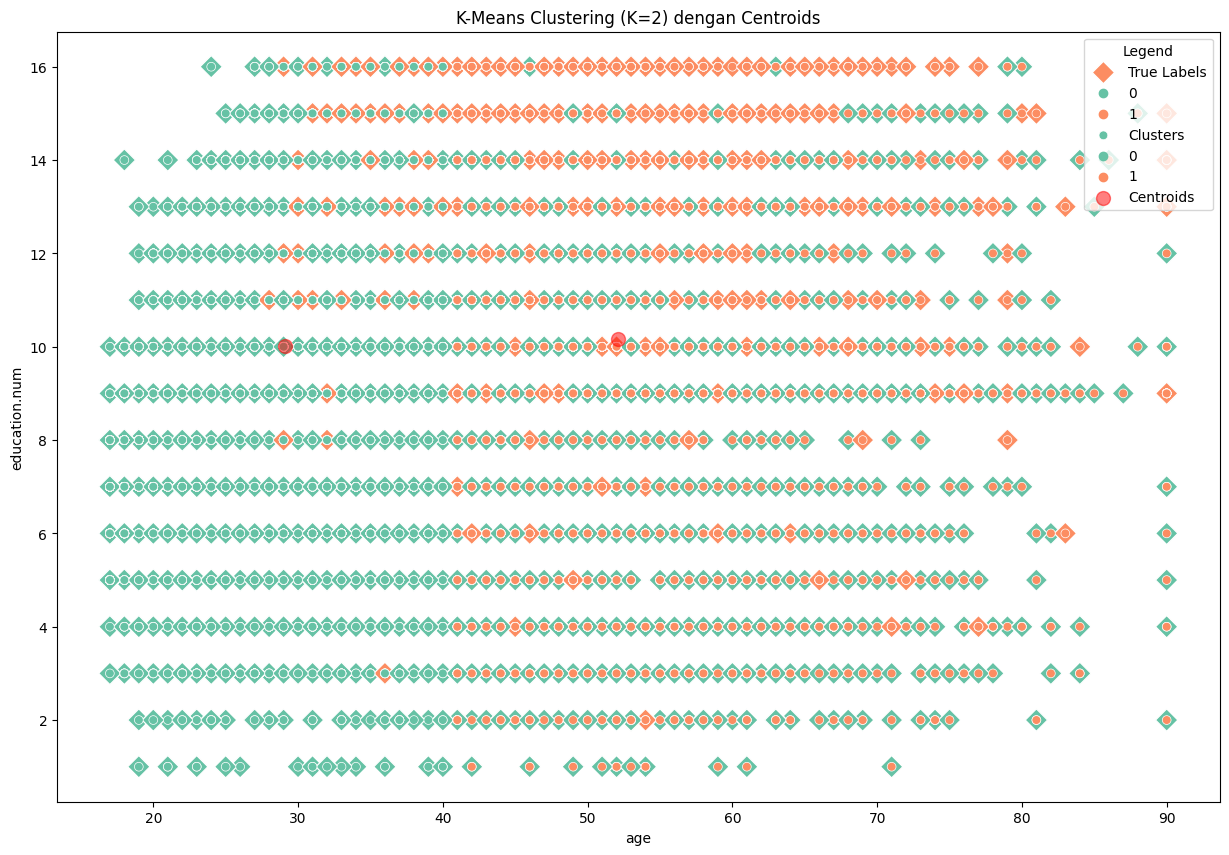

In [211]:
plt.figure(figsize=(15,10))
sns.scatterplot(data=incomenew, x="age", y="education.num", hue="income", palette='Set2', marker="D", s=130, label="True Labels")
sns.scatterplot(data=incomenew, x="age", y="education.num", hue="cluster", palette='Set2', marker="o", s=40, label="Clusters")
plt.scatter(centroids[:,0], centroids[:,1], alpha=0.5, c='red', s=100, label='Centroids')
plt.title(f"K-Means Clustering (K={K}) dengan Centroids")
plt.xlabel("age")
plt.ylabel("education.num")
plt.legend(title="Legend", loc="upper right")
plt.show()